In [ ]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.random import set_seed
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# For reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# Loading Fashion MNIST Dataset

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Train:", x_train.shape, y_train.shape)
print("Test: ", x_test.shape,  y_test.shape)

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


In [ ]:
# Preprocessing Data

# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# NN input (flattened)
X_train_nn = x_train.reshape(-1, 28*28)
X_test_nn  = x_test.reshape(-1, 28*28)

# CNN input (28×28×1)
X_train_cnn = x_train.reshape(-1, 28, 28, 1)
X_test_cnn  = x_test.reshape(-1, 28, 28, 1)

# One-hot labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test,  num_classes=10)

print("NN input shape:", X_train_nn.shape, X_test_nn.shape)
print("CNN input shape:", X_train_cnn.shape, X_test_cnn.shape)
print("Labels shape:",  y_train_cat.shape, y_test_cat.shape)

NN input shape: (60000, 784) (10000, 784)
CNN input shape: (60000, 28, 28, 1) (10000, 28, 28, 1)
Labels shape: (60000, 10) (10000, 10)


In [ ]:
# Model Architecture Functions

# Neural Network (NN) Model Functions
def create_nn_model():
    model = Sequential()
    # Hidden layer 1
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.3))
    # Hidden layer 2
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    # Hidden layer 3
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Output layer
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Training & Evaluation Of Neural Network (NN) Model

nn_model = create_nn_model()
history_nn = nn_model.fit( X_train_nn, y_train_cat, validation_split=0.1, epochs=15, batch_size=200, verbose=2)

nn_loss, nn_acc = nn_model.evaluate(X_test_nn, y_test_cat, verbose=0)
print(f"NN Test Accuracy: {nn_acc*100:.2f}%")

Epoch 1/15
270/270 - 4s - 15ms/step - accuracy: 0.7703 - loss: 0.6379 - val_accuracy: 0.8503 - val_loss: 0.4021
Epoch 2/15
270/270 - 1s - 3ms/step - accuracy: 0.8448 - loss: 0.4319 - val_accuracy: 0.8587 - val_loss: 0.3803
Epoch 3/15
270/270 - 1s - 5ms/step - accuracy: 0.8568 - loss: 0.3908 - val_accuracy: 0.8680 - val_loss: 0.3528
Epoch 4/15
270/270 - 1s - 3ms/step - accuracy: 0.8669 - loss: 0.3680 - val_accuracy: 0.8690 - val_loss: 0.3477
Epoch 5/15
270/270 - 1s - 4ms/step - accuracy: 0.8728 - loss: 0.3487 - val_accuracy: 0.8768 - val_loss: 0.3439
Epoch 6/15
270/270 - 1s - 5ms/step - accuracy: 0.8786 - loss: 0.3322 - val_accuracy: 0.8810 - val_loss: 0.3370
Epoch 7/15
270/270 - 1s - 3ms/step - accuracy: 0.8812 - loss: 0.3221 - val_accuracy: 0.8798 - val_loss: 0.3267
Epoch 8/15
270/270 - 1s - 3ms/step - accuracy: 0.8827 - loss: 0.3139 - val_accuracy: 0.8813 - val_loss: 0.3299
Epoch 9/15
270/270 - 1s - 4ms/step - accuracy: 0.8873 - loss: 0.3060 - val_accuracy: 0.8828 - val_loss: 0.3225


In [ ]:
# Convolutional Neural Network (CNN) Model
def create_cnn_model():
    model = Sequential()
    # Conv block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    # Conv block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    # Flatten & dense head
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    # Additional dense layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    # Output layer
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# # Training & Evaluation Convolutional Neural Network (CNN) Model

cnn_model = create_cnn_model()
history_cnn = cnn_model.fit(X_train_cnn, y_train_cat, validation_split=0.1, epochs=15, batch_size=200, verbose=2)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"CNN Test Accuracy: {cnn_acc*100:.2f}%")

Epoch 1/15
270/270 - 6s - 23ms/step - accuracy: 0.6171 - loss: 1.0465 - val_accuracy: 0.7902 - val_loss: 0.5283
Epoch 2/15
270/270 - 1s - 5ms/step - accuracy: 0.7680 - loss: 0.6365 - val_accuracy: 0.8180 - val_loss: 0.4573
Epoch 3/15
270/270 - 2s - 9ms/step - accuracy: 0.8017 - loss: 0.5567 - val_accuracy: 0.8495 - val_loss: 0.4075
Epoch 4/15
270/270 - 1s - 5ms/step - accuracy: 0.8245 - loss: 0.4997 - val_accuracy: 0.8618 - val_loss: 0.3749
Epoch 5/15
270/270 - 3s - 9ms/step - accuracy: 0.8383 - loss: 0.4603 - val_accuracy: 0.8743 - val_loss: 0.3422
Epoch 6/15
270/270 - 3s - 10ms/step - accuracy: 0.8506 - loss: 0.4309 - val_accuracy: 0.8787 - val_loss: 0.3308
Epoch 7/15
270/270 - 3s - 9ms/step - accuracy: 0.8589 - loss: 0.4067 - val_accuracy: 0.8845 - val_loss: 0.3089
Epoch 8/15
270/270 - 1s - 5ms/step - accuracy: 0.8666 - loss: 0.3931 - val_accuracy: 0.8870 - val_loss: 0.3057
Epoch 9/15
270/270 - 2s - 9ms/step - accuracy: 0.8682 - loss: 0.3822 - val_accuracy: 0.8898 - val_loss: 0.2946

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


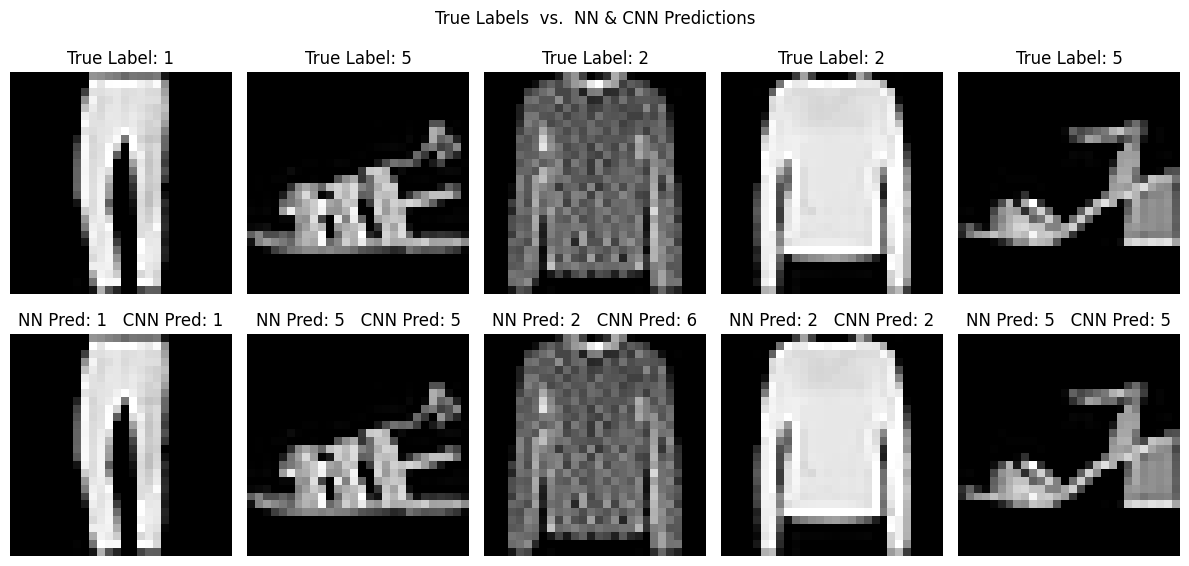

In [ ]:
# Sample Predictions Comparison

# 5 random test images
indices = np.random.choice(len(x_test), size=5, replace=False)

plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    # True label
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True Label: {y_test[idx]}")
    plt.axis('off')

    # Predictions
    nn_pred  = nn_model.predict(X_test_nn[idx:idx+1]).argmax(axis=1)[0]
    cnn_pred = cnn_model.predict(X_test_cnn[idx:idx+1]).argmax(axis=1)[0]

    plt.subplot(2, 5, i + 6)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"NN Pred: {nn_pred}   CNN Pred: {cnn_pred}")
    plt.axis('off')

plt.suptitle("True Labels  vs.  NN & CNN Predictions")
plt.tight_layout()
plt.show()

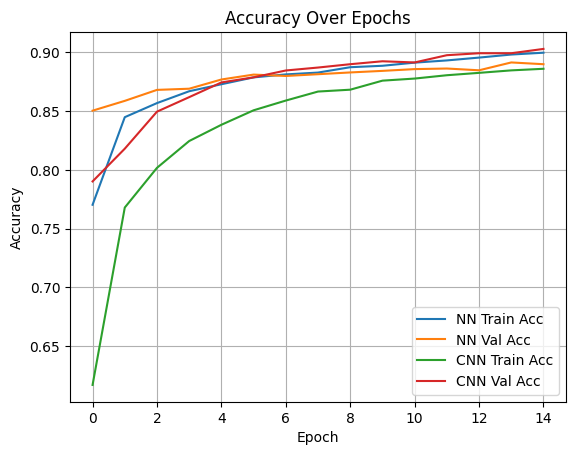

In [ ]:
# Plot Training Histories

# Plot Training vs. Validation Accuracy over Epochs
plt.plot(history_nn.history['accuracy'], label='NN Train Acc')
plt.plot(history_nn.history['val_accuracy'], label='NN Val Acc')
plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

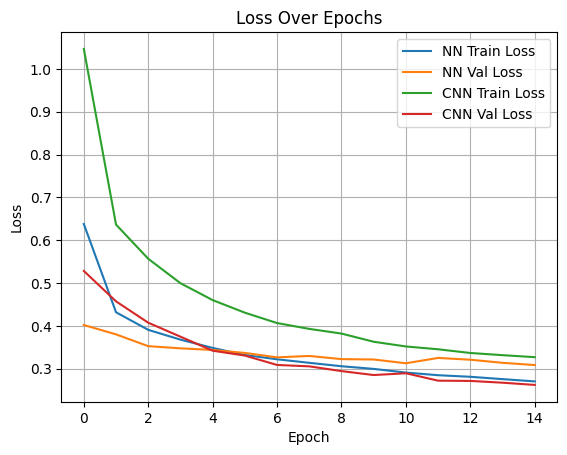

In [ ]:
# Plot Training vs. Validation Loss
plt.plot(history_nn.history['loss'], label='NN Train Loss')
plt.plot(history_nn.history['val_loss'], label='NN Val Loss')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()